# Playground Lorenz 1996 Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
# Add src folder to path for importing modules
sys.path.insert(1, "../src")

In [3]:
from lorenz96_model import integrate_L96_2t, L96

## Two time-scale model

### Test time-stepping two time-scale model

In [4]:
# Variable settings
K = 36  # Number of global-scale variables X
J = 10  # Number of local-scale Y variables per single global-scale X variable
nt = 1000  # Number of time steps
si = 0.005  # Sampling time interval
dt = 0.005  # Time step
F = 10.0  # Forcing
h = 1.0  # Coupling coefficient
b = 10.0  # ratio of amplitudes
c = 10.0  # time-scale ratio (scale separation)

In [5]:
# Help function for plotting
def s(k, K):
    """A non-dimension coordinate from -1..+1 corresponding to k=0..K"""
    return 2 * (0.5 + k) / K - 1

In [6]:
k = np.arange(K)  # For coordinate in plots
j = np.arange(J * K)  # For coordinate in plots

# Initial conditions
X_init = s(k, K) * (s(k, K) - 1) * (s(k, K) + 1)
Y_init = 0 * s(j, J * K) * (s(j, J * K) - 1) * (s(j, J * K) + 1)

# "Run" model
X, Y, t = integrate_L96_2t(X_init, Y_init, si, nt, F, h, b, c, dt=dt)

Text(0.5, 1.0, 'Full model history $Y_{j,k}(t)$')

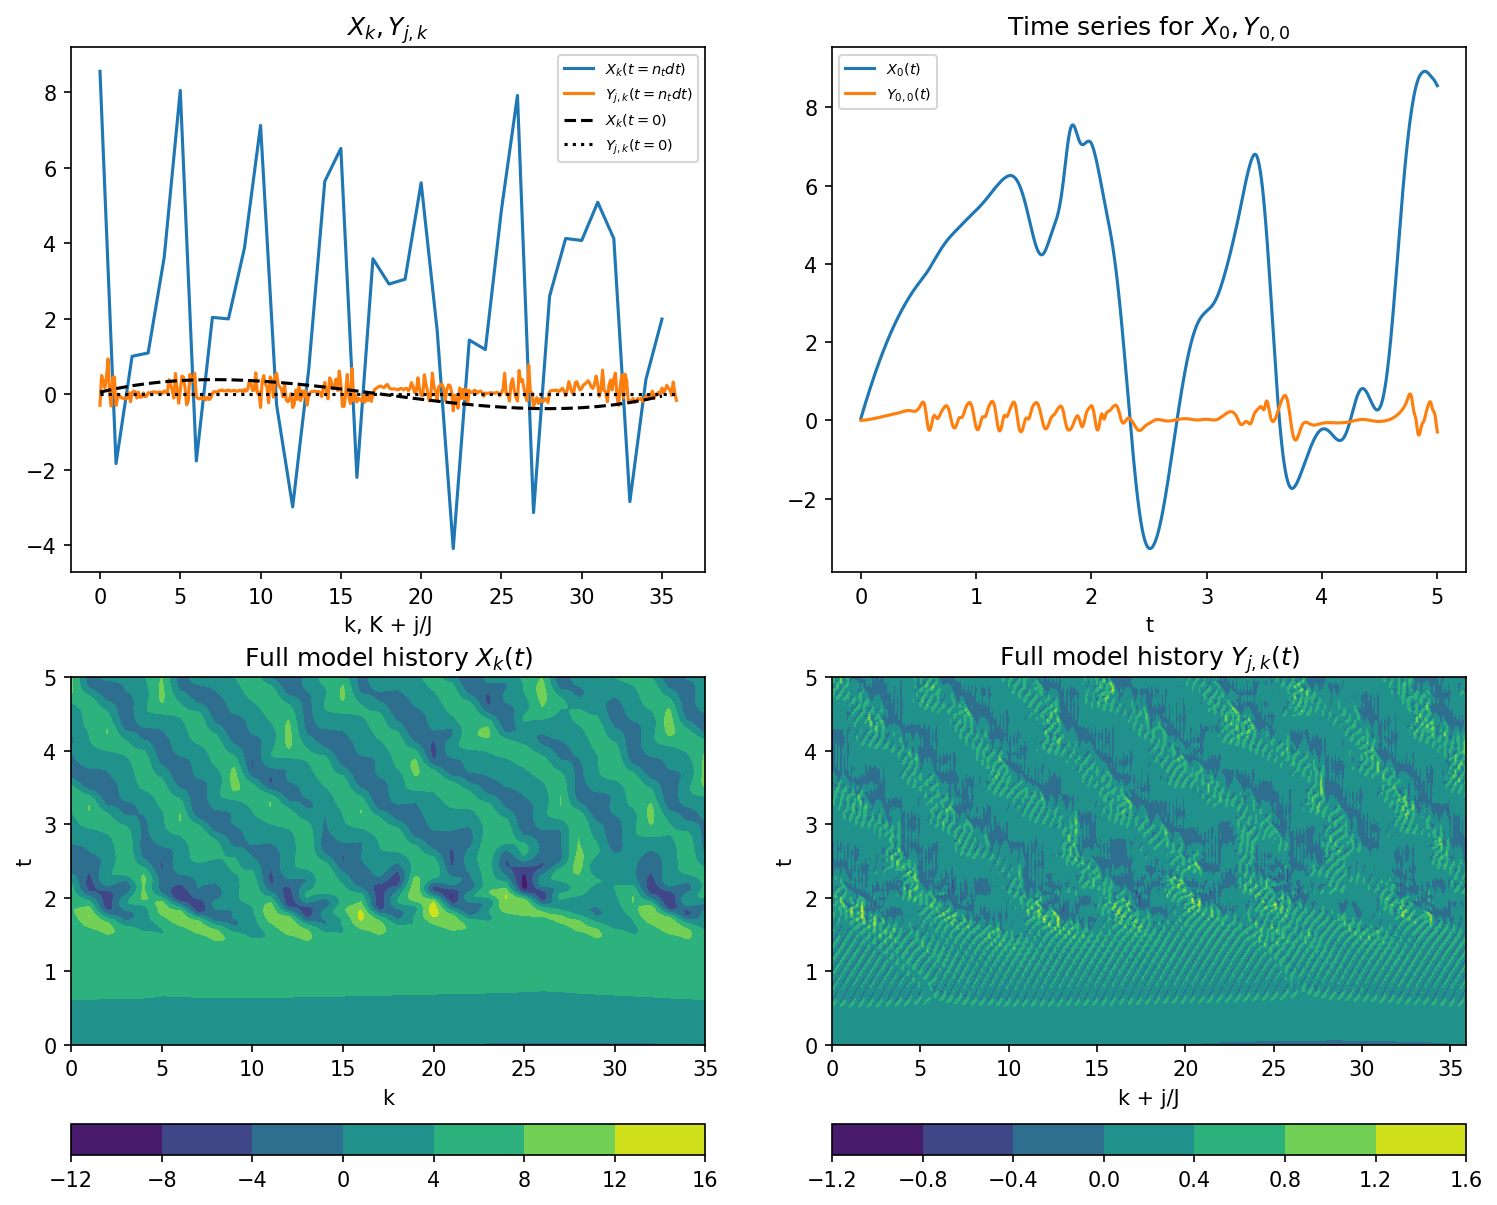

In [7]:
plt.figure(figsize=(12, 10), dpi=150)

plt.subplot(221) # nrows, ncols, index

# Snapshot of X[k] at time n_t
plt.plot(k, X[-1], label="$X_k(t=n_t dt)$")
plt.plot(j / J, Y[-1], label="$Y_{j,k}(t=n_t dt)$")
plt.plot(k, X_init, "k--", label="$X_k(t=0)$")
plt.plot(j / J, Y_init, "k:", label="$Y_{j,k}(t=0)$")
plt.legend(fontsize=7)
plt.xlabel("k, K + j/J")
plt.title("$X_k, Y_{j,k}$")

plt.subplot(222)

# Sample time-series X[0](t), Y[0](t)
plt.plot(t, X[:, 0], label="$X_0(t)$")
plt.plot(t, Y[:, 0], label="$Y_{0,0}(t)$")
plt.legend(fontsize=7)
plt.xlabel("t")
plt.title("Time series for $X_0, Y_{0,0}$")

plt.subplot(223)

# Full model history of X
plt.contourf(k, t, X)
plt.colorbar(orientation="horizontal")
plt.xlabel("k")
plt.ylabel("t")
plt.title("Full model history $X_k(t)$")

plt.subplot(224)

# Full model history of Y
plt.contourf(j / J, t, Y)
plt.colorbar(orientation="horizontal")
plt.xlabel("k + j/J")
plt.ylabel("t")
plt.title("Full model history $Y_{j,k}(t)$")

### Class for numerical integration of the two time-scale L96

In [8]:
help(L96)

Help on class L96 in module lorenz96_model:

class L96(builtins.object)
 |  L96(K, J, F=18, h=1, b=10, c=10, t=0, dt=0.001)
 |  
 |  Class for two time-scale Lorenz 1996 model
 |  
 |  Methods defined here:
 |  
 |  __init__(self, K, J, F=18, h=1, b=10, c=10, t=0, dt=0.001)
 |      Construct a two time-scale model with parameters:
 |      K  : Number of X values
 |      J  : Number of Y values per X value
 |      F  : Forcing term (default 18.)
 |      h  : coupling coefficient (default 1.)
 |      b  : ratio of amplitudes (default 10.)
 |      c  : time-scale ratio (default 10.)
 |      t  : Initial time (default 0.)
 |      dt : Time step (default 0.001)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  copy(self)
 |  
 |  print(self)
 |  
 |  randomize_IC(self)
 |      Randomize the initial conditions (or current state)
 |  
 |  run(self, si, T, store=False, return_coupling=False)
 |      Run model for a total time of T, sam

In [9]:
m = L96(K, J, F, h, b, c, dt=0.005)
m

L96: K=36 J=10 F=10.0 h=1.0 b=10.0 c=10.0 dt=0.005

In [10]:
# Set the initial conditions (here X is the same cubic as above, Y=0)
m.set_state(s(m.k, m.K) * (s(m.k, m.K) - 1) * (s(m.k, m.K) + 1), 0 * m.j)
print(m)

L96: K=36 J=10 F=10.0 h=1.0 b=10.0 c=10.0 dt=0.005
 X=[ 0.05326217  0.14641204  0.22258659  0.28281464  0.328125    0.35954647
  0.37810785  0.38483796  0.3807656   0.36691958  0.3443287   0.31402178
  0.27702761  0.234375    0.18709276  0.13620971  0.08275463  0.02775634
 -0.02775634 -0.08275463 -0.13620971 -0.18709276 -0.234375   -0.27702761
 -0.31402178 -0.3443287  -0.36691958 -0.3807656  -0.38483796 -0.37810785
 -0.35954647 -0.328125   -0.28281464 -0.22258659 -0.14641204 -0.05326217]
 Y=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [11]:
# Run the model for 1000 sample intervals, or for time 1000*0.005 = 5
X2, Y2, t = m.run(0.005, 5)

print("Mean absolute difference =", np.abs(X2 - X).mean() + np.abs(Y2 - Y).mean())

Mean absolute difference = 0.0


In [12]:
# Run the model as above but use the end state as an initial condition for the next run.
# (Re-running this cell will give different answers after the first run)
X2, Y2, t = m.run(0.005, 5, store=True)

print(
    "Mean absolute difference 1st run=", np.abs(X2 - X).mean() + np.abs(Y2 - Y).mean()
)

X2, Y2, t = m.run(0.005, 5, store=True)
print(
    "Mean absolute difference 2nd run=", np.abs(X2 - X).mean() + np.abs(Y2 - Y).mean()
)

Mean absolute difference 1st run= 0.0
Mean absolute difference 2nd run= 4.761055522025149


In [13]:
# Putting it all together
X3, Y3, t = (
    L96(36, 10, F=10, dt=0.005)
    .set_state(s(m.k, m.K) * (s(m.k, m.K) - 1) * (s(m.k, m.K) + 1), 0 * m.j)
    .run(0.005, 5)
)

## Lorenz-96 and its GCM analog

### Control Simulation: Two time-scale model

In [14]:
np.random.seed(23)
W = L96(K=8, J=32)
T = 5.0
%time X_true,Y_true,t = W.run(0.05, T)

CPU times: user 90.5 ms, sys: 1.24 ms, total: 91.7 ms
Wall time: 91.2 ms


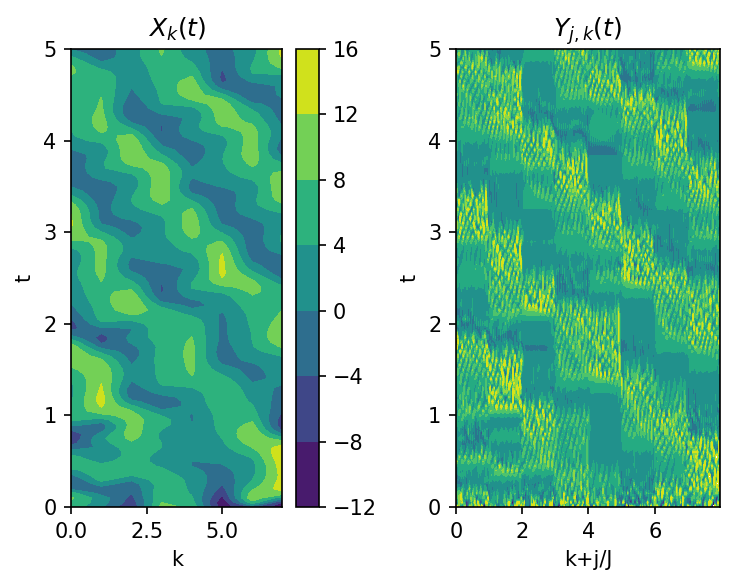

In [15]:
plt.figure(figsize=(5, 4), dpi=150)

plt.subplot(121) # nrows, ncols, index
plt.contourf(W.k, t, X_true)
plt.colorbar()
plt.xlabel("k")
plt.ylabel("t")
plt.title("$X_k(t)$")

plt.subplot(122)
plt.contourf(W.j / W.J, t, Y_true, levels=np.linspace(-1, 1, 10))
plt.xlabel("k+j/J")
plt.ylabel("t")
plt.title("$Y_{j,k}(t)$")

plt.tight_layout()

### GCM analog: Single time-scale model

#### Without coupling (sub-grid effects)

In [16]:
from lorenz96_model import L96_eq1_xdot

In [17]:
#  We define the GCM which solves for X in time and returns its time series
def GCM(X0, F, dt, nt, param=[0]):
    time, hist, X = dt * np.arange(nt), np.zeros((nt, len(X0))) * np.nan, X0.copy()

    for n in range(nt):
        X = X + dt * (L96_eq1_xdot(X, F) - np.polyval(param, X))
        if np.abs(X).max() > 1e3:
            break
        hist[n], time[n] = X, dt * (n + 1)
    return hist, time

In [18]:
X_init, dt, F_mod = X_true[0], 0.002, W.F
# set the initial condition to be the same
# we also set the dt to be smaller as the Euler scheme is less accurate

# no parameterization
X_gcm_no_param, T_gcm_no_param = GCM(X_init, F_mod, dt, int(T / dt))

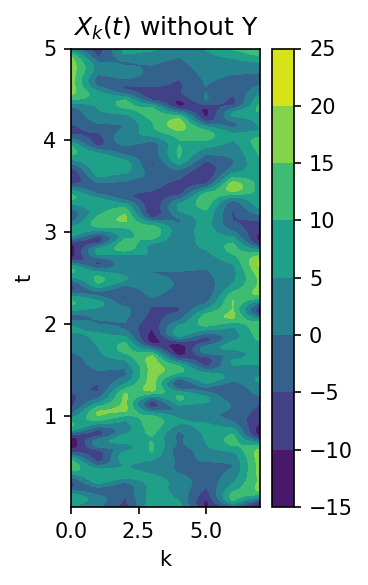

In [19]:
plt.figure(figsize=(2.5, 4), dpi=150)

plt.subplot(111)
plt.contourf(W.k, T_gcm_no_param, X_gcm_no_param)
plt.colorbar()
plt.xlabel("k")
plt.ylabel("t")
plt.title("$X_k(t)$ without Y")

plt.tight_layout()

#### Computing the parameterization

In [20]:
# We first run the 2 time-scale model again for longer time, to generate more data.
# si = sampling interval
# T = total time
%time X, Y, t = W.run(si=0.05, T=200.) 

CPU times: user 3.83 s, sys: 35.7 ms, total: 3.87 s
Wall time: 4.08 s


In [21]:
X_copy = X
# Generate U_k samples from 2 time-scale model
# using the longer time series, we now generate samples of U_k that are used to
# estimate the unknown parameters.
U_sample = (W.h * W.c / W.b) * Y.reshape((Y.shape[0], W.K, W.J)).sum(axis=-1)

In [22]:
# Fit polynomial of order 1.
p1 = np.polyfit(
    X_copy.flatten(), U_sample.flatten(), 1
)  # Fit a linear curve through the data.
print("Linear Poly coeffs:", p1)

# We use the parameters from from Wilks, 2005
p4 = [
    0.000707,
    -0.0130,
    -0.0190,
    1.59,
    0.275,
]
# We could have just as easily have fit the parameters using the data as well.

Linear Poly coeffs: [0.85427061 0.73687561]


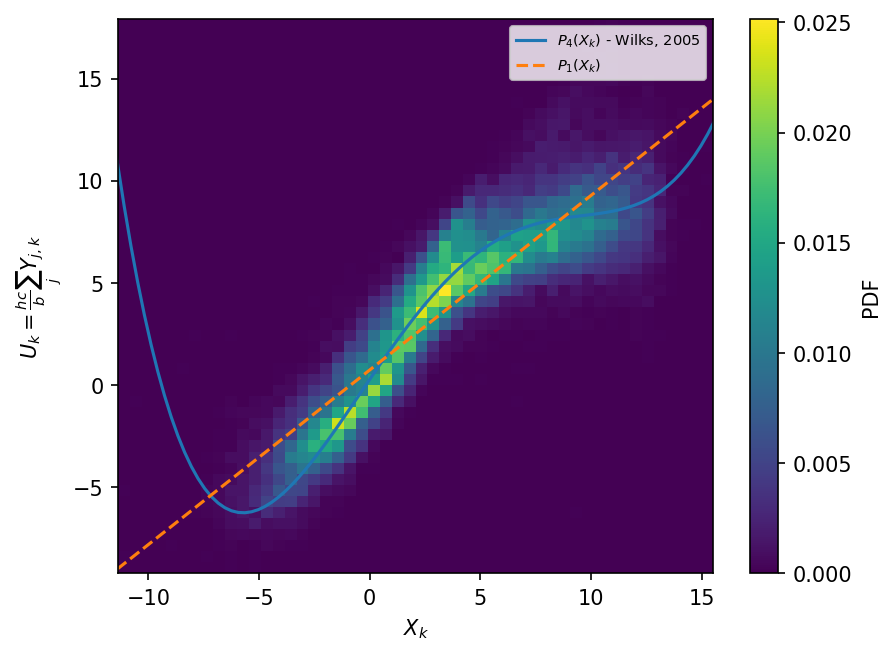

In [23]:
plt.figure(dpi=150)
# 2D histogram of X vs U
plt.hist2d(X_copy.flatten(), U_sample.flatten(), bins=50, density=True)
plt.xlabel("$X_k$")
plt.ylabel(r"$U_k = \frac{hc}{b}\sum_j Y_{j,k}$")
plt.colorbar(label="PDF")

# Fits from polynomials
x = np.linspace(-12, 18, 100)
plt.plot(x, np.polyval(p4, x), label="$P_4(X_k)$ - Wilks, 2005")
plt.plot(x, np.polyval(p1, x), "--", label="$P_1(X_k)$")


plt.legend(fontsize=7);

#### Add parameterization to single time-scale model

In [24]:
np.random.seed(13)
T = 5
# Real world
X_true, Y_true, T_true = W.randomize_IC().run(0.05, T)
X_init, dt, F_mod = X_true[0] + 0.0 * np.random.randn(W.K), 0.002, W.F + 0.0
# The reason for adding the zero terms to X and F will become clear below, where the amplitude will be increased.

# no parameterization
X_gcm1, T_gcm1 = GCM(X_init, F_mod, dt, int(T / dt))
# Linear parameterization
X_gcm2, T_gcm2 = GCM(X_init, F_mod, dt, int(T / dt), param=p1)
# Wilks parameterization - 4th order polynomial.
X_gcm3, T_gcm3 = GCM(X_init, F_mod, dt, int(T / dt), param=p4)

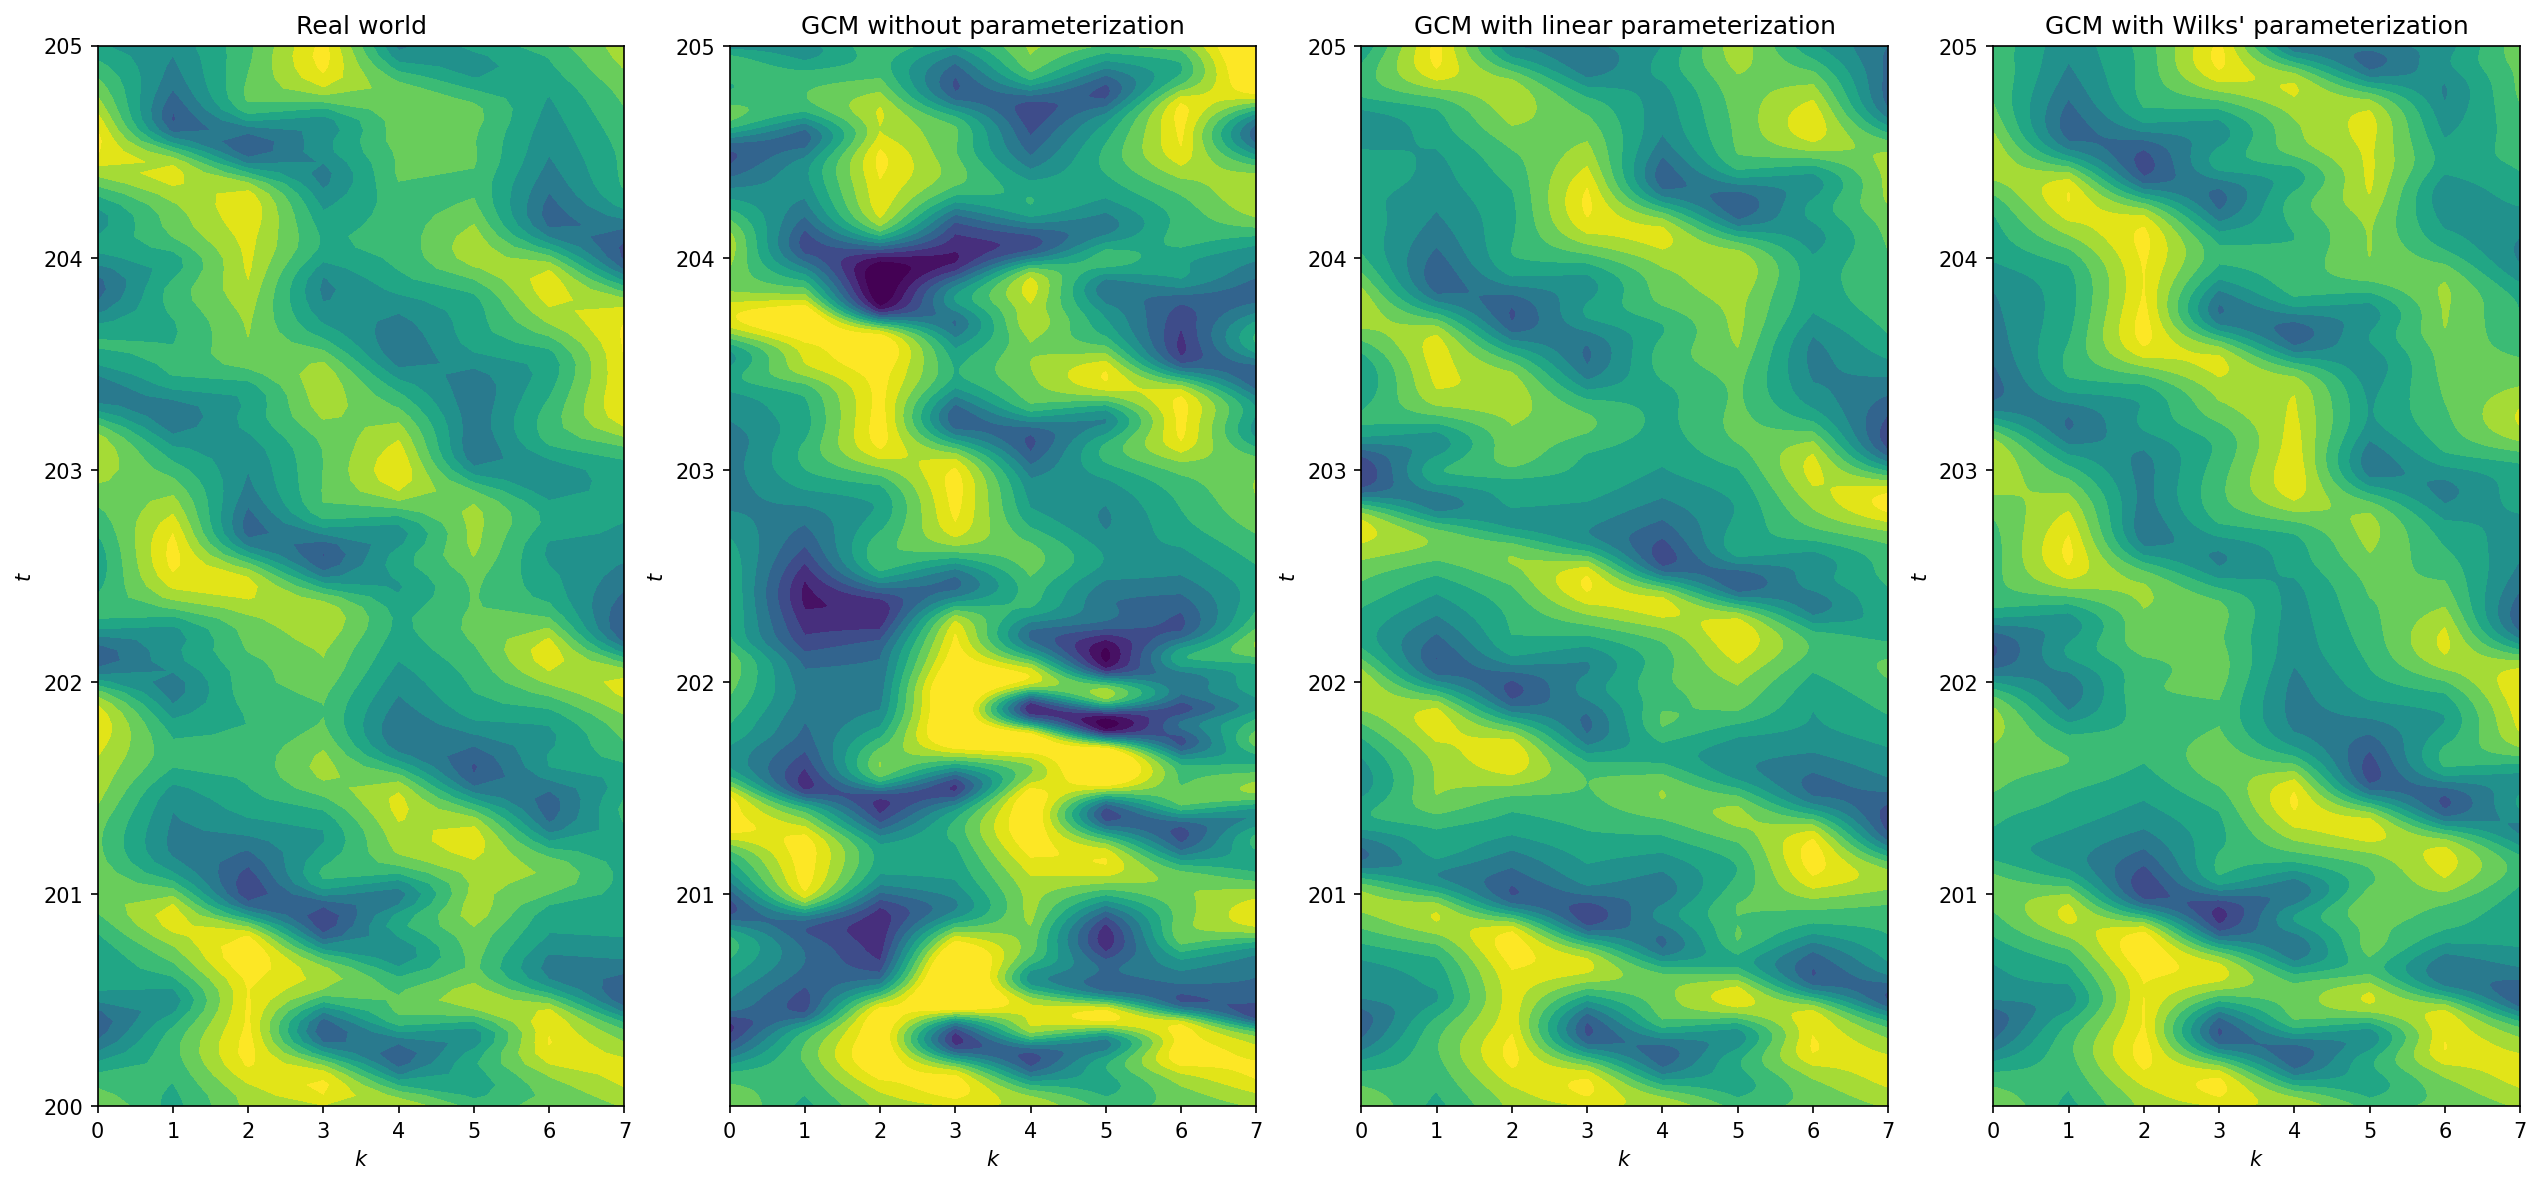

In [25]:
plt.figure(dpi=150, figsize=(17, 8))
lims = {"vmin": -12, "vmax": 12, "levels": np.linspace(-12, 12, 12), "extend": "both"}
plt.subplot(141)
plt.contourf(W.k, T_true + t[-1], X_true, **lims)
plt.xlabel("$k$")
plt.ylabel("$t$")
plt.title("Real world")
plt.subplot(142)
plt.contourf(W.k, T_gcm1 + t[-1], X_gcm1, **lims)
plt.xlabel("$k$")
plt.ylabel("$t$")
plt.title("GCM without parameterization")
plt.subplot(143)
plt.contourf(W.k, T_gcm3 + t[-1], X_gcm2, **lims)
plt.xlabel("$k$")
plt.ylabel("$t$")
plt.title("GCM with linear parameterization")
plt.subplot(144)
plt.contourf(W.k, T_gcm2 + t[-1], X_gcm3, **lims)
plt.xlabel("$k$")
plt.ylabel("$t$")
plt.title("GCM with Wilks' parameterization")

plt.tight_layout()

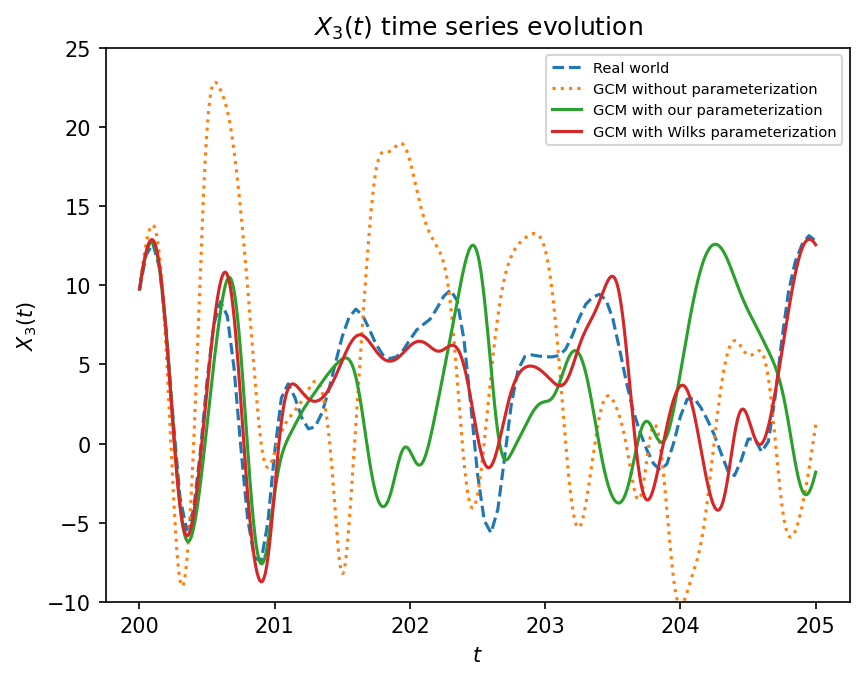

In [26]:
k = 3
plt.figure(dpi=150)
plt.plot(T_true + t[-1], X_true[:, k], "--", label="Real world")
plt.plot(T_gcm1 + t[-1], X_gcm1[:, k], ":", label="GCM without parameterization")
plt.plot(T_gcm1 + t[-1], X_gcm2[:, k], label="GCM with our parameterization")
plt.plot(T_gcm1 + t[-1], X_gcm3[:, k], label="GCM with Wilks parameterization")
plt.xlabel("$t$")
plt.ylabel("$X_3(t)$")
plt.legend(fontsize=7, loc=1)
plt.ylim(-10, 25)
plt.title(f"$X_{k}(t)$ time series evolution");

## GCM parameterizations, skill metrics, and other sources of uncertainty

In [27]:
from numba import jit
from lorenz96_model import L96, RK2, RK4, EulerFwd, L96_eq1_xdot

In [28]:
# Setting the seed gives us reproducible results
np.random.seed(13)

# Create a "real world" with K = 8 and J = 32
W = L96(K=8, J=32, F=18)

In [ ]:
# Spin up model for 3 days
# `store=True` saves the final state as an initial condition for the next run.
W.run(si=0.05, t_total=3.0, store=True);

### GCM without parameterization

In [30]:
# GCM without parameterization, unstable due to Euler forward time stepping scheme
def GCM_no_parameterization(X0, F, dt, nt):
    """GCM without parameterization

    Args:
        X0: initial conditions
        dt: time increment
        nt: number of forward steps to take
    """
    time, hist, X = (
        dt * np.arange(nt + 1),
        np.zeros((nt + 1, len(X0))) * np.nan,
        X0.copy(),
    )
    hist[0] = X

    for n in range(nt):
        X = X + dt * (L96_eq1_xdot(X, F))
        hist[n + 1], time[n + 1] = X, dt * (n + 1)
    return hist, time



In [31]:
F, dt, T = 18, 0.01, 3.0
X, t = GCM_no_parameterization(W.X, F, dt, int(T / dt))

/var/folders/gq/qzs45nmn1wb85t9jjr1fgw040000gn/T/ipykernel_3666/3072944298.py:18: RuntimeWarning: invalid value encountered in add
  X = X + dt * (L96_eq1_xdot(X, F))


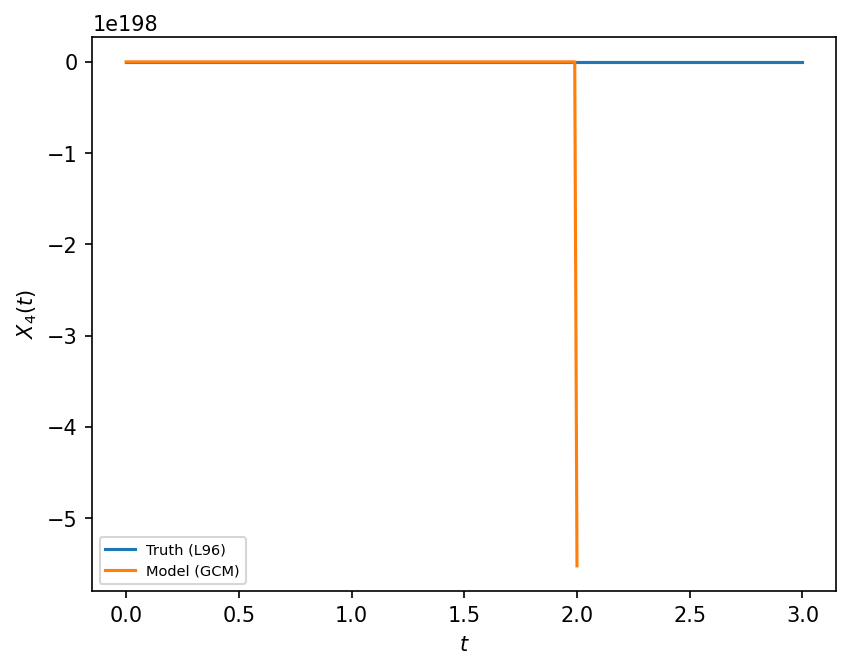

In [32]:
# Compare with the real world
X_true, _, _ = W.run(dt, T)

plt.figure(dpi=150)
plt.plot(t, X_true[:, 4], label="Truth (L96)")
plt.plot(t, X[:, 4], label="Model (GCM)")
plt.xlabel("$t$")
plt.ylabel("$X_4(t)$")
plt.legend(fontsize=7);

### GCM with parameterization

In [33]:
# Here we introduce a class to solve for the one time-scale problem,
# which can take arbitrary parameterizations and time-stepping schemes as input.
class GCM:
    """GCM with parameterization in rhs of equation for tendency"""

    def __init__(self, F, parameterization, time_stepping=EulerFwd):
        self.F = F
        self.parameterization = parameterization
        self.time_stepping = time_stepping

    def rhs(self, X, param):
        return L96_eq1_xdot(X, self.F) - self.parameterization(param, X)

    def __call__(self, X0, dt, nt, param=[0]):
        """
        Args:
            X0: initial conditions
            dt: time increment
            nt: number of forward steps to take
            param: parameters of our closure
        """
        time, hist, X = (
            dt * np.arange(nt + 1),
            np.zeros((nt + 1, len(X0))) * np.nan,
            X0.copy(),
        )
        hist[0] = X

        for n in range(nt):
            X = self.time_stepping(self.rhs, dt, X, param)
            hist[n + 1], time[n + 1] = X, dt * (n + 1)
        return hist, time

In [34]:
# linear polynomial parameterization
naive_parameterization = lambda param, X: np.polyval(param, X)
F, dt, T = 18, 0.01, 5.0
gcm = GCM(F, naive_parameterization)
X, t = gcm(W.X, dt, int(T / dt), param=[0.85439536, 0.75218026])
# we use the parameters for the linear polynomial parameterization that were learnt previously.

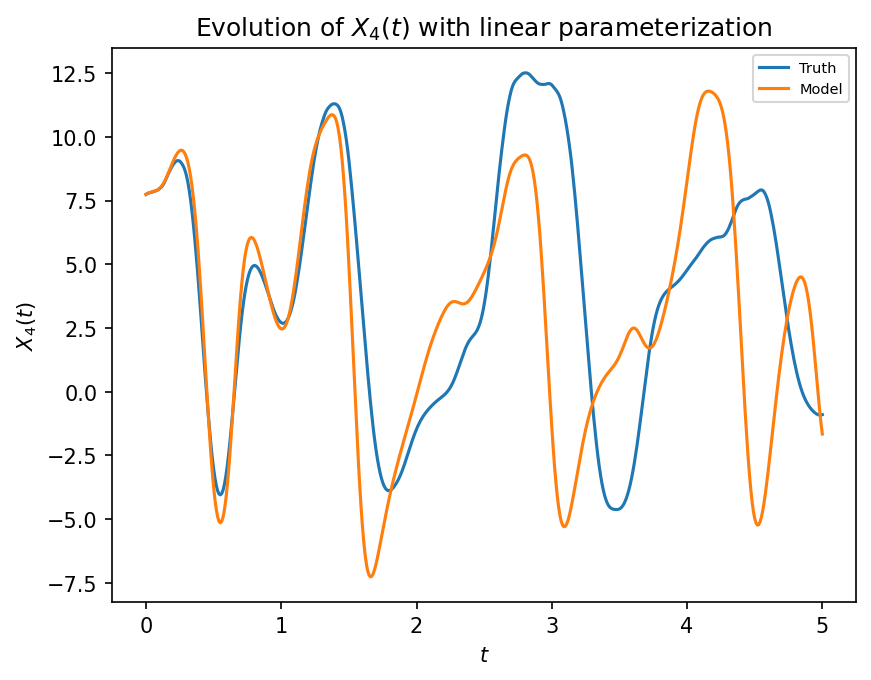

In [35]:
# Compare with the real world
X_true, _, _ = W.run(dt, T)

plt.figure(dpi=150)
plt.plot(t, X_true[:, 4], label="Truth")
plt.plot(t, X[:, 4], label="Model")
plt.xlabel("$t$")
plt.ylabel("$X_4(t)$")
plt.legend(fontsize=7)
plt.title("Evolution of $X_4(t)$ with linear parameterization");

### Stochastic or deterministic parameterizations?

In [36]:
# Randomising the initial Ys
np.random.seed(13)

# Duplicating L96 to create perturbed versions that include random perturbations in Y
Wp1 = W.copy()
Yp1 = W.Y.std() * np.random.rand(Wp1.Y.size)
Wp1.set_state(W.X, Yp1)

Wp2 = W.copy()
Yp2 = W.Y + 0.0001 * np.random.rand(Wp2.Y.size)
Wp2.set_state(W.X, Yp2)

L96: K=8 J=32 F=18 h=1 b=10 c=10 dt=0.001

In [37]:
# Running L96 and perturbed versions to compare results
X_true, _, _ = W.run(dt, T)
X_pert1, _, _ = Wp1.run(dt, T)
X_pert2, _, _ = Wp2.run(dt, T)

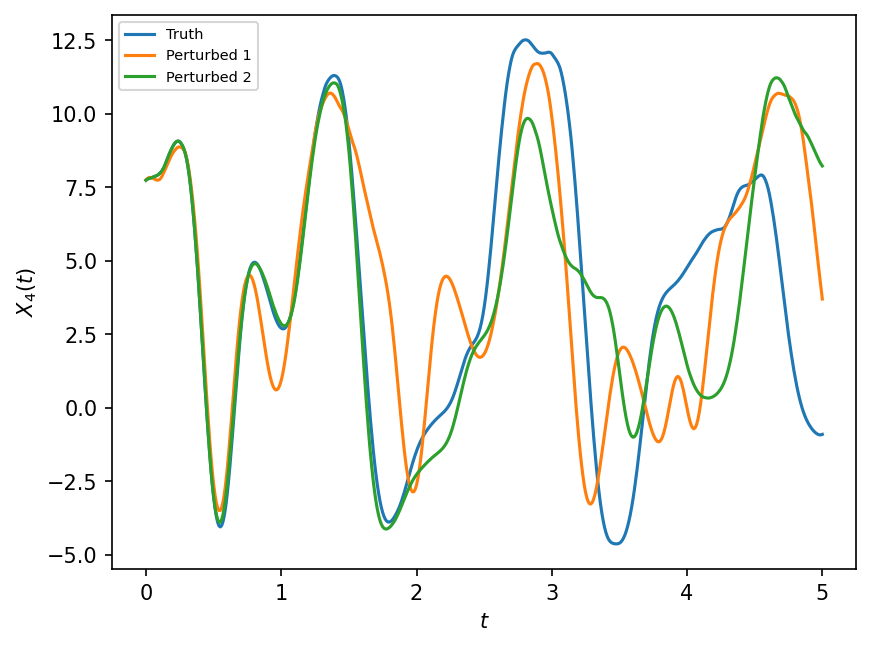

In [38]:
plt.figure(dpi=150)
plt.plot(t, X_true[:, 4], label="Truth")
plt.plot(t, X_pert1[:, 4], label="Perturbed 1")
plt.plot(t, X_pert2[:, 4], label="Perturbed 2")
plt.xlabel("$t$")
plt.ylabel("$X_4(t)$")
plt.legend(fontsize=7);

# Small perturbations in Y lead to large differences in X
# This is due to the non-linear nature of the Lorenz 96 model.

### Parameterization skill

In [39]:
# Defining our GCM
F, dt, T = 18, 0.005, 1000.0
# Use Runge-Kutta time stepping scheme because forward Euler would lead to instabilities
gcm = GCM(F, naive_parameterization, time_stepping=RK4)

# Evaluate the GCMs
X_gcm, t = gcm(W.X, dt, int(T / dt), param=[0.85439536, 0.75218026])
X_gcm_no_param, _ = gcm(W.X, dt, int(T / dt), param=[0, 0])

# Evaluate the true state
X_true, _, _ = W.run(dt, T)

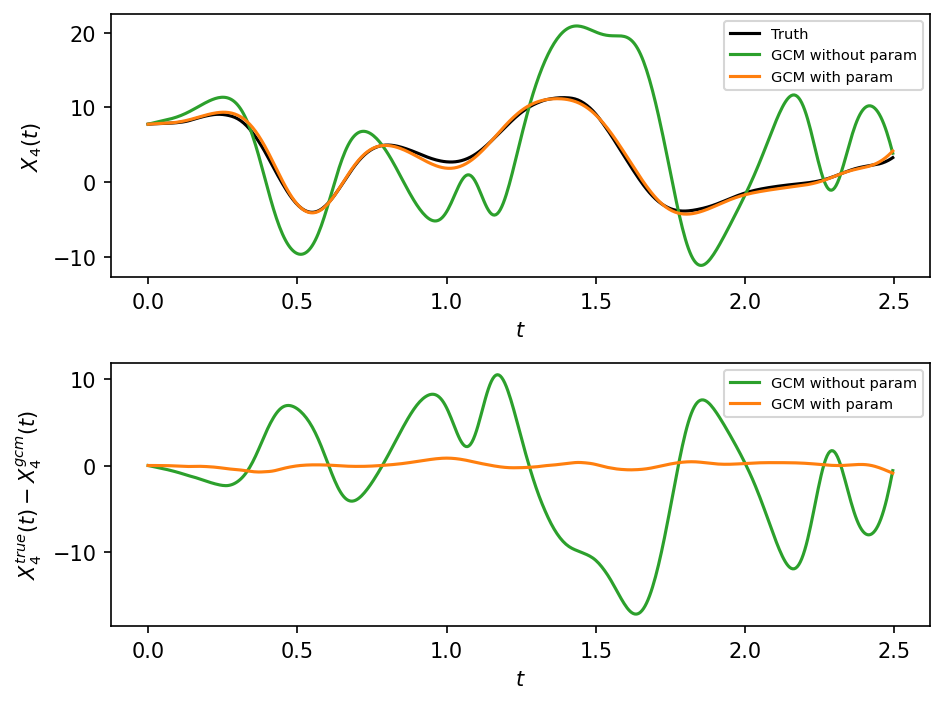

In [40]:
# Plotting the results
plt.figure(dpi=150)

plt.subplot(211)
plt.plot(t[:500], X_true[:500, 4], label="Truth", color="k")
plt.plot(t[:500], X_gcm_no_param[:500, 4], label="GCM without param", color="tab:green")
plt.plot(t[:500], X_gcm[:500, 4], label="GCM with param", color="tab:orange")

plt.xlabel("$t$")
plt.ylabel("$X_4(t)$")
plt.legend(fontsize=7)

plt.subplot(212)
plt.plot(
    t[:500],
    (X_true[:500, 4] - X_gcm_no_param[:500, 4]),
    label="GCM without param",
    color="tab:green",
)
plt.plot(
    t[:500],
    (X_true[:500, 4] - X_gcm[:500, 4]),
    label="GCM with param",
    color="tab:orange",
)
plt.xlabel("$t$")
plt.ylabel("$X_4^{true}(t) - X_4^{gcm}(t)$")
plt.legend(fontsize=7)

plt.tight_layout()

#### Error metric based on model evolution

In [41]:
def error_model_evolution(X1, X2, L, dt=dt):
    """Model evolution error computed over some window t < L."""
    D = np.cumsum(
        np.sqrt((X1[: int(L / dt), :] - X2[: int(L / dt), :]) ** 2), axis=0
    ) / (np.expand_dims(np.arange(1, int(L / dt) + 1), axis=1))
    return D


In [42]:
dist = error_model_evolution(X_true, X_gcm, T)
dist_no_param = error_model_evolution(X_true, X_gcm_no_param, T)

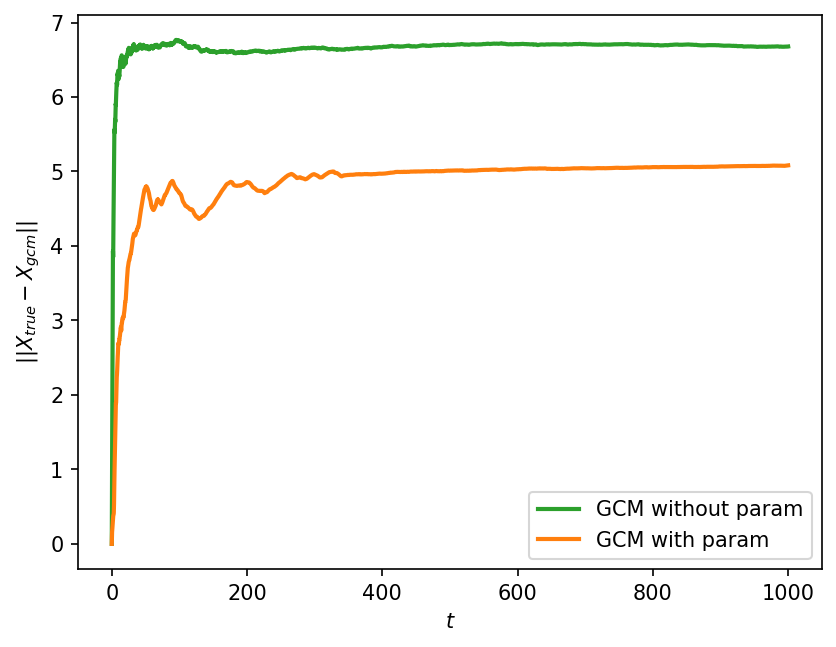

In [43]:
# Plotting how this distance grows with the length of the window
# for all the components of X
plt.figure(dpi=150)
plt.plot(
    t[1:],
    np.mean(dist_no_param, 1),
    linewidth=2,
    label="GCM without param",
    color="tab:green",
)
plt.plot(
    t[1:], np.mean(dist, 1), linewidth=2, label="GCM with param", color="tab:orange"
)


plt.xlabel("$t$")
plt.legend()
plt.ylabel("$||X_{true}-X_{gcm}||$");

#### Climatology based error

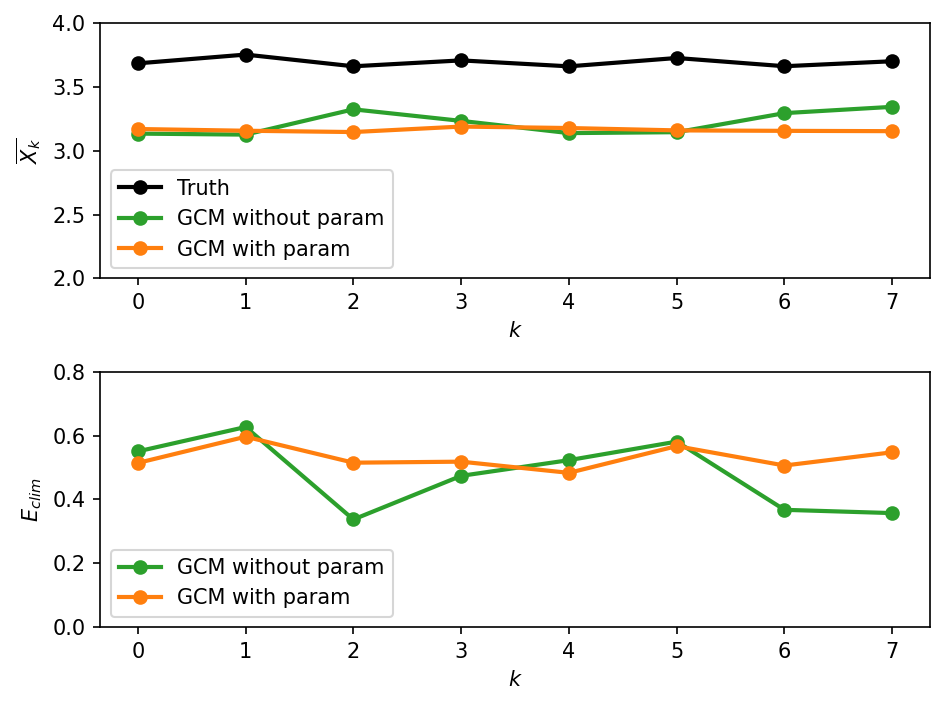

In [44]:
plt.figure(dpi=150)

plt.subplot(211)
plt.plot(np.mean(X_true, 0), marker="o", linewidth=2, color="k", label="Truth")
plt.plot(
    np.mean(X_gcm_no_param, 0),
    marker="o",
    linewidth=2,
    color="tab:green",
    label="GCM without param",
)
plt.plot(
    np.mean(X_gcm, 0),
    marker="o",
    linewidth=2,
    color="tab:orange",
    label="GCM with param",
)

plt.xlabel("$k$")
plt.ylabel("$\overline{X_{k}}$")
plt.ylim([2, 4])
plt.legend()

plt.subplot(212)
plt.plot(
    np.sqrt((np.mean(X_gcm_no_param, 0) - np.mean(X_true, 0)) ** 2),
    marker="o",
    linewidth=2,
    color="tab:green",
    label="GCM without param",
)
plt.plot(
    np.sqrt((np.mean(X_gcm, 0) - np.mean(X_true, 0)) ** 2),
    marker="o",
    linewidth=2,
    color="tab:orange",
    label="GCM with param",
)

plt.xlabel("$k$")
plt.ylabel("$E_{clim}$")
plt.ylim([0, 0.8])
plt.legend()

plt.tight_layout()

#### Distribution based error metric

In [45]:
import seaborn as sns

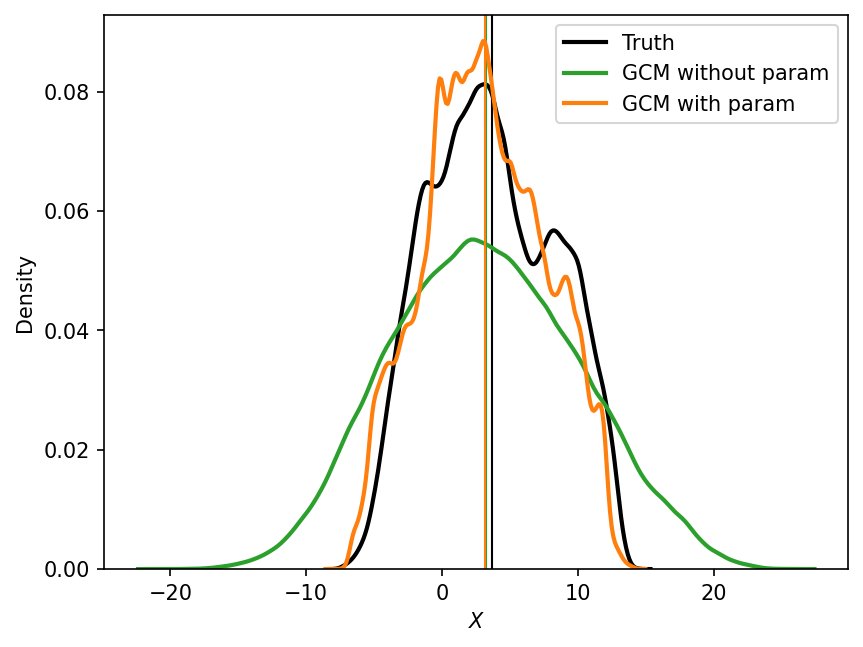

In [46]:
plt.figure(dpi=150)

sns.kdeplot(X_true.ravel(), color="k", linewidth=2, label="Truth")
plt.axvline(X_true.mean(), color="k", linewidth=1, label="_none")

sns.kdeplot(
    X_gcm_no_param.ravel(), color="tab:green", linewidth=2, label="GCM without param"
)
plt.axvline(X_gcm_no_param.mean(), color="tab:green", linewidth=1, label="_none")

sns.kdeplot(X_gcm.ravel(), color="tab:orange", linewidth=2, label="GCM with param")
plt.axvline(X_gcm.mean(), color="tab:orange", linewidth=1, label="_none")

plt.xlabel("$X$")
plt.legend()

In [47]:
from scipy.stats import wasserstein_distance


def error_distribution(X1, X2):
    """Distribution error measured by the Wasserstein distance."""

    diff = wasserstein_distance(X1, X2)

    return diff

In [48]:
E_distr_no_param = [error_distribution(X_true[:, k], X_gcm_no_param[:, k]) for k in W.k]
E_distr_param = [error_distribution(X_true[:, k], X_gcm[:, k]) for k in W.k]

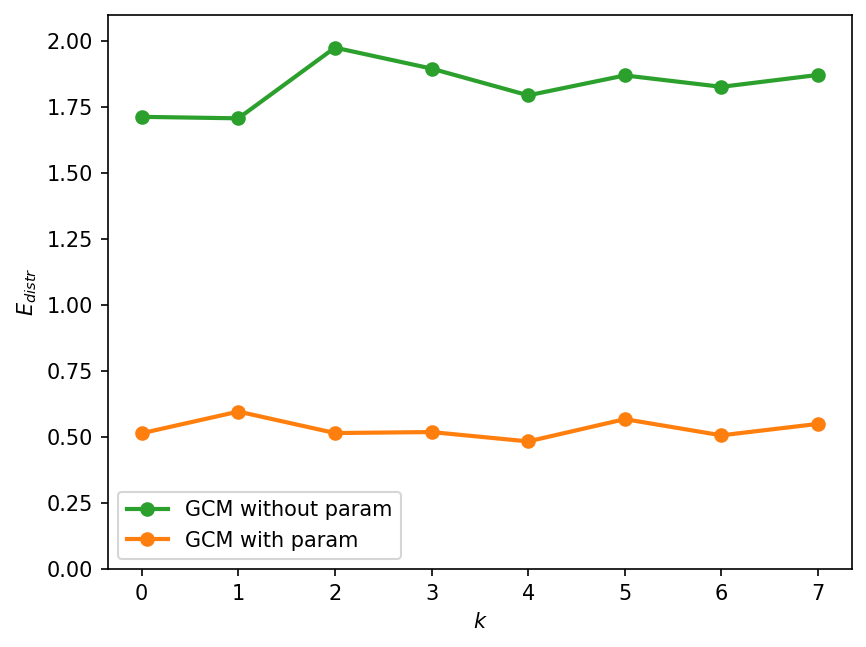

In [49]:
plt.figure(dpi=150)
plt.plot(
    W.k,
    E_distr_no_param,
    marker="o",
    color="tab:green",
    label="GCM without param",
    linewidth=2,
)
plt.plot(
    W.k,
    E_distr_param,
    marker="o",
    color="tab:orange",
    label="GCM with param",
    linewidth=2,
)

plt.xlabel("$k$")
plt.ylabel("$E_{distr}$")
plt.ylim([0, 2.1])
plt.legend()

#### Tendency based error metric

In [50]:
def norm_initial_tendency(X1, X2):
    T1 = X1[1, :] - X1[0, :]
    T2 = X2[1, :] - X2[0, :]
    return np.sqrt((T1 - T2) ** 2).mean(axis=0)

In [51]:
F, dt = 18, 0.01

# Let's define again the true state
# But only run for 1 time step
X_true, _, _ = W.run(dt, dt)

# and an ensemble of trajectories
gcm = GCM(F, naive_parameterization)

n = 100

_p1 = np.linspace(-20, 20, n + 1)
_p2 = np.linspace(-20, 20, n + 1)
xp1, yp2 = np.meshgrid(_p1, _p2)

score = np.zeros((n + 1, n + 1))

for i, p1 in enumerate(_p1):
    for j, p2 in enumerate(_p2):
        X_gcm, t = gcm(W.X, dt, 1, param=[p1, p2])  # run gcm for 1 time step
        score[i, j] = norm_initial_tendency(X_true, X_gcm)

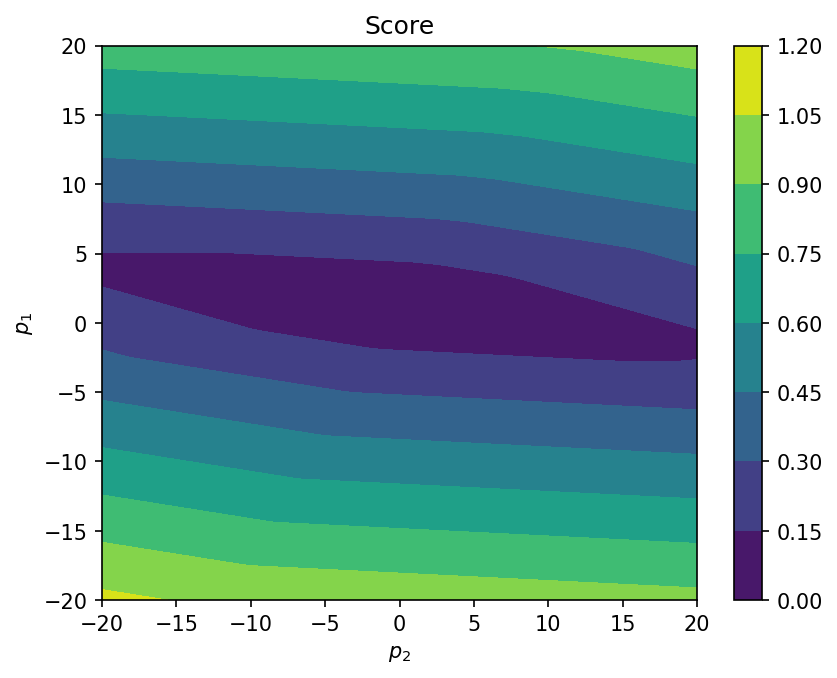

In [52]:
plt.figure(dpi=150)
plt.contourf(xp1, yp2, score)
plt.colorbar()
plt.xlabel("$p_2$")
plt.ylabel("$p_1$")
plt.title("Score");

### Sources of model error

In [53]:
# Generic GCM parameters
F, dt, T = 18, 0.002, 40.0
X0 = W.X

# Remember the optimized parameters from previous notebook
p1 = [0.85439536, 0.75218026]
p4 = [
    0.000707,
    -0.0130,
    -0.0190,
    1.59,
    0.275,
]

# Sampling real world over a longer period of time
X_true, _, t = W.run(dt, T)

# GCM with different parameterizations
gcm = GCM(F, naive_parameterization)
X_no_param, t = gcm(W.X, dt, int(T / dt), param=[0])  # Missing physics
X_p1, _ = gcm(W.X, dt, int(T / dt), param=p1)  # Simpler but poorer parameterization
X_p4, _ = gcm(W.X, dt, int(T / dt), param=p4)  # More complex parameterization

# GCM with perturbed forcing
gcm_pert_F = GCM(F + 1.0, naive_parameterization)
X_frc, _ = gcm_pert_F(W.X, dt, int(T / dt), param=p4)  # Perturbed forcing

# GCM with perturbed IC
X_IC, _ = gcm(W.X + 0.5, dt, int(T / dt), param=p4)  # Perturbed IC

# GCM with changed dt
X_dt, t_dt = gcm(W.X, 5 * dt, int(T / (5 * dt)), param=p4)  # Larged dt

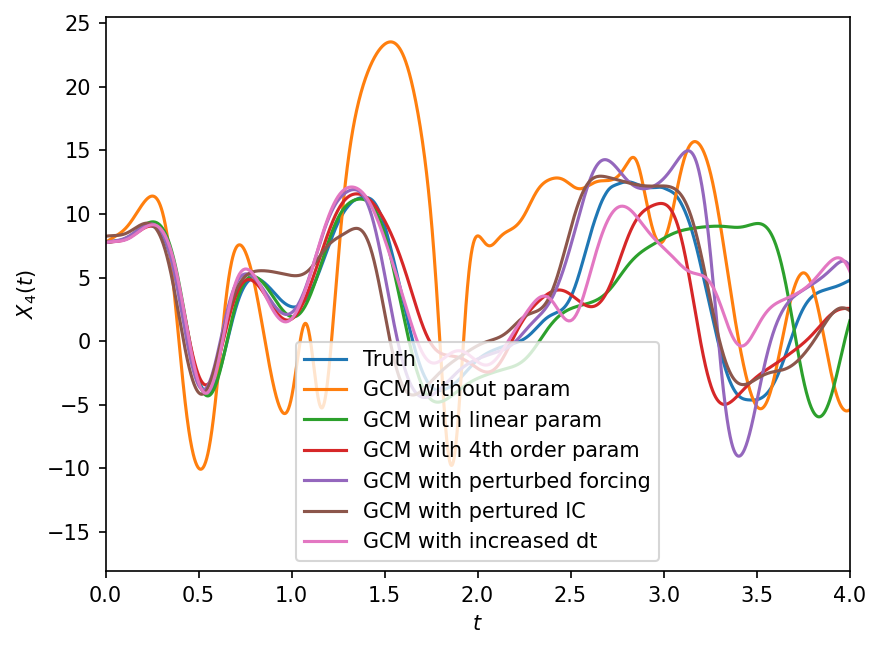

In [54]:
plt.figure(dpi=150)

plt.plot(t, X_true[:, 4], label="Truth")
plt.plot(t, X_no_param[:, 4], label="GCM without param")
plt.plot(t, X_p1[:, 4], label="GCM with linear param")
plt.plot(t, X_p4[:, 4], label="GCM with 4th order param")
plt.plot(t, X_frc[:, 4], label="GCM with perturbed forcing")
plt.plot(t, X_IC[:, 4], label="GCM with pertured IC")
plt.plot(t_dt, X_dt[:, 4], label="GCM with increased dt")

plt.xlim([0, 4])
plt.legend()

plt.xlabel("$t$")
plt.ylabel("$X_{4}(t)$");

In [55]:
def dist(X1, X2, T, dt=dt):
    return np.mean(error_model_evolution(X1, X2, T, dt), 1)

In [56]:
dist_no_param = dist(X_true, X_no_param, T, dt)
dist_p1 = dist(X_true, X_p1, T, dt)
dist_p4 = dist(X_true, X_p4, T, dt)
dist_frc = dist(X_true, X_frc, T, dt)
dist_IC = dist(X_true, X_IC, T, dt)
dist_dt = dist(X_true[::5], X_dt, T, 5 * dt)

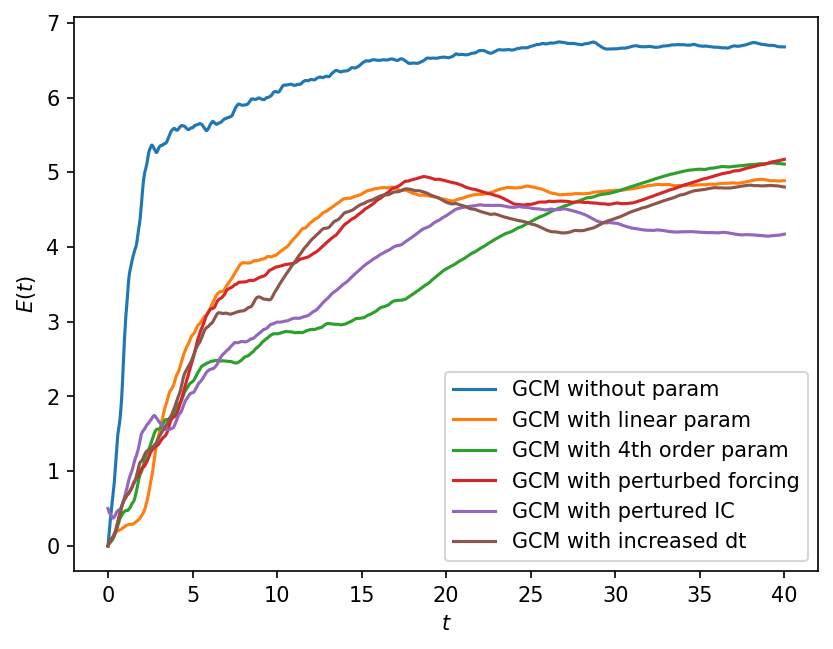

In [57]:
plt.figure(dpi=150)
plt.plot(t[1:], dist_no_param, label="GCM without param")
plt.plot(t[1:], dist_p1, label="GCM with linear param")
plt.plot(t[1:], dist_p4, label="GCM with 4th order param")
plt.plot(t[1:], dist_frc, label="GCM with perturbed forcing")
plt.plot(t[1:], dist_IC, label="GCM with pertured IC")
plt.plot(t_dt[1:], dist_dt, label="GCM with increased dt")

plt.legend()
plt.xlabel("$t$")
plt.ylabel("$E(t)$");

## Tuning GCM parameterizations

### GCM parameterization problem

In [58]:
import scipy.optimize as opt

# L96 provides the "real world", L96_eq1_xdot is the beginning of rhs of X tendency
from lorenz96_model import L96, RK2, RK4, EulerFwd, L96_eq1_xdot

In [59]:
# Setting the seed gives us reproducible results
np.random.seed(13)

# Create a "real world" with K=8 and J=32
W = L96(K=8, J=32, F=18)

In [60]:
# (store=True save the final state as an initial condition for the next run)
W.run(0.05, 3.0, store=True);

In [61]:
class GCM:
    def __init__(self, F, parameterization, time_stepping=EulerFwd):
        """
        GCM with parameterization
        Args:
            F: forcing
            parameterization: function that takes parameters and returns a tendency
            time_stepping: time stepping method
        """
        self.F = F
        self.parameterization = parameterization
        self.time_stepping = time_stepping

    def rhs(self, X, param):
        """
        Args:
            X: state vector
            param: parameters of our closure
        """
        return L96_eq1_xdot(X, self.F) - self.parameterization(param, X)

    def __call__(self, X0, dt, nt, param=[0]):
        """
        Args:
            X0: initial conditions
            dt: time increment
            nt: number of forward steps to take
            param: parameters of our closure
        """
        time, hist, X = (
            dt * np.arange(nt + 1),
            np.zeros((nt + 1, len(X0))) * np.nan,
            X0.copy(),
        )
        hist[0] = X

        for n in range(nt):
            X = self.time_stepping(self.rhs, dt, X, param)
            hist[n + 1], time[n + 1] = X, dt * (n + 1)
        return hist, time

In [64]:
# simple linear regression parameterization
naive_parameterization = lambda param, X: np.polyval(param, X)

In [65]:
F, dt, T = 18, 0.005, 5.0
gcm = GCM(F, naive_parameterization)
# We pass the parameters that were obtained by fitting the linear in 'The Lorenz-96 GCM Analog' notebook.
X, t = gcm(W.X, dt, int(T / dt), param=[0.85439536, 0.75218026])
# We also simulate a case with no parameterization, to show that even the imperfect parameterization is helpful.
X_no_param, t = gcm(W.X, dt, int(T / dt), param=[0.0, 0.0])

In [66]:
# This samples the real world with the same time interval as "dt" used by the model
X_true, _, _ = W.run(dt, T)

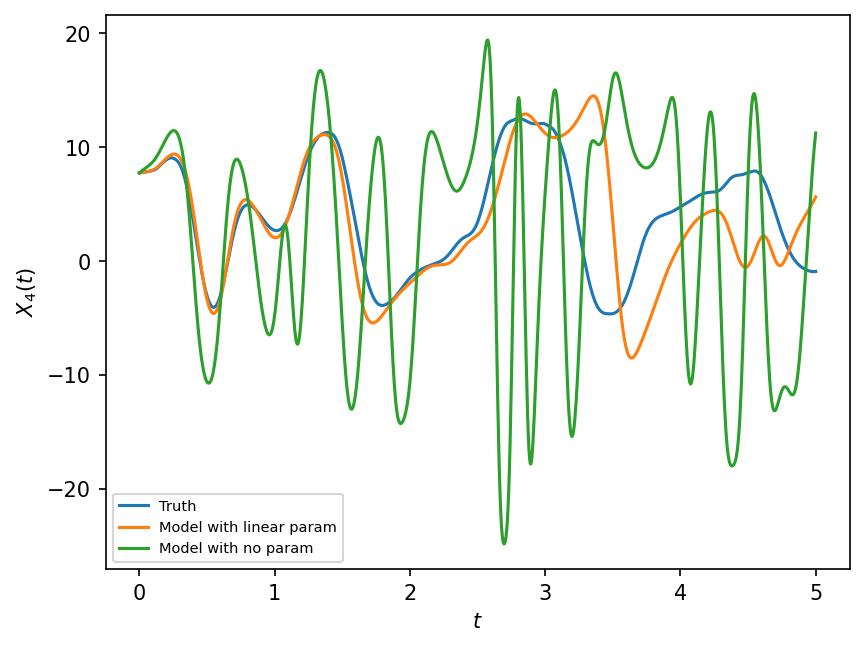

In [67]:
plt.figure(dpi=150)
plt.plot(t, X_true[:, 4], label="Truth")
plt.plot(t, X[:, 4], label="Model with linear param")
plt.plot(t, X_no_param[:, 4], label="Model with no param")
plt.xlabel("$t$")
plt.ylabel("$X_4(t)$")
plt.legend(fontsize=7);

### Variational estimation of optimal parameters for predefined closure

In [68]:
# - assuming the formulation of the parameterization
gcm = GCM(F, naive_parameterization)

#### Estimating parameters based on initial conditions

Cost function

In [69]:
def norm_initial_tendency(X1, X2):
    T1 = X1[1, :] - X1[0, :]
    T2 = X2[1, :] - X2[0, :]
    return np.sqrt((T1 - T2) ** 2).mean(axis=0)

In [ ]:
def cost_function(param):
    F, dt, T = 18, 0.01, 0.01
    X_gcm, t = gcm(W.X, dt, int(T / dt), param=param)
    return norm_initial_tendency(X_true, X_gcm)

Minimization

In [71]:
prior = np.array([0.85439536, 0.75218026])  #  prior
res = opt.minimize(cost_function, prior, method="Powell")
opt_param = res["x"]

In [72]:
print(f"Optimized parameters = {opt_param}")

Optimized parameters = [0.36705635 6.193072  ]


Test the closure

In [73]:
F, dt, T = 18, 0.01, 100.0
gcm = GCM(F, naive_parameterization)
X_optimized, t = gcm(W.X, dt, int(T / dt), param=opt_param)
X_prior, t = gcm(W.X, dt, int(T / dt), param=prior)

# - ... the true state
X_true, _, _ = W.run(dt, T)

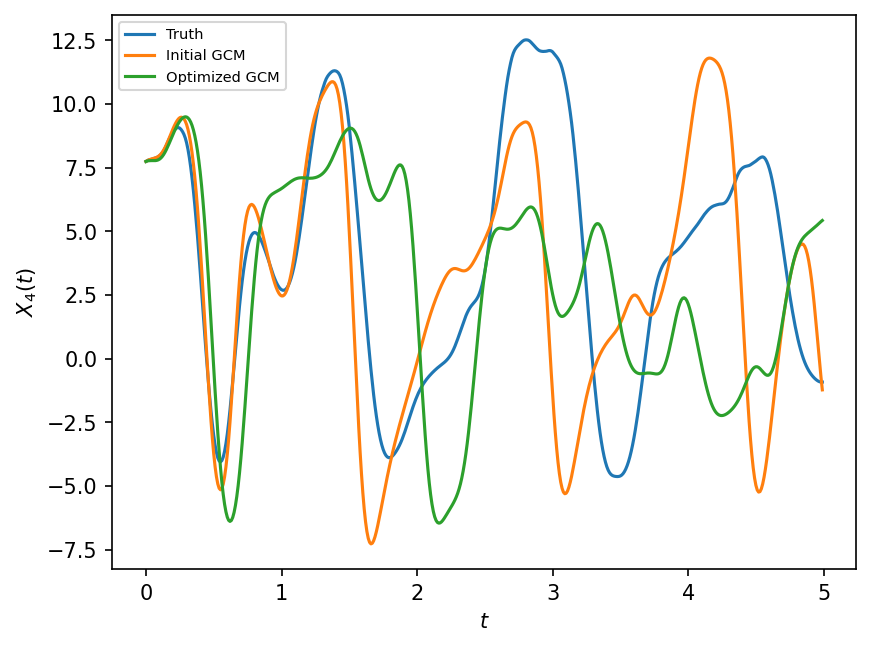

In [74]:
plt.figure(dpi=150)
plt.plot(t[:500], X_true[:500, 4], label="Truth")
plt.plot(t[:500], X_prior[:500, 4], label="Initial GCM")
plt.plot(t[:500], X_optimized[:500, 4], label="Optimized GCM")
plt.xlabel("$t$")
plt.ylabel("$X_4(t)$")
plt.legend(fontsize=7);

#### Estimating parameters which optimize longer trajectories

In [75]:
F, dt, T = 18, 0.01, 5.0
gcm = GCM(F, naive_parameterization)
X_true, _, _ = W.run(dt, T)

In [76]:
X_gcm, t = gcm(W.X, dt, int(T / dt), param=[0, 0])

/opt/homebrew/Caskroom/miniforge/base/envs/uncertainty/lib/python3.11/site-packages/numpy/lib/_polynomial_impl.py:778: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv


In [77]:
# - pointwise distance :
def pointwise(X1, X2, L=1.0):
    # computed over some window t<L.
    D = (X1 - X2)[np.where(t < L)]
    return np.sqrt(D**2).mean(axis=0)

In [78]:
def cost_function(param):
    F, dt, T = 18, 0.01, 5
    X_gcm, t = gcm(W.X, dt, int(T / dt), param=param)
    return pointwise(X_true, X_gcm, L=5.0).sum()

In [79]:
prior = np.array([0.85439536, 0.75218026])  #  prior
res = opt.minimize(cost_function, prior, method="Powell")
opt_param = res["x"]

In [80]:
print(f"Optimized parameters = {opt_param}")

Optimized parameters = [ 1.87212275 -1.32960035]


Test the closure

In [81]:
F, dt, T = 18, 0.01, 100.0
gcm = GCM(F, naive_parameterization)
X_optimized, t = gcm(W.X, dt, int(T / dt), param=opt_param)
X_prior, t = gcm(W.X, dt, int(T / dt), param=prior)
X_true, _, _ = W.run(dt, T)

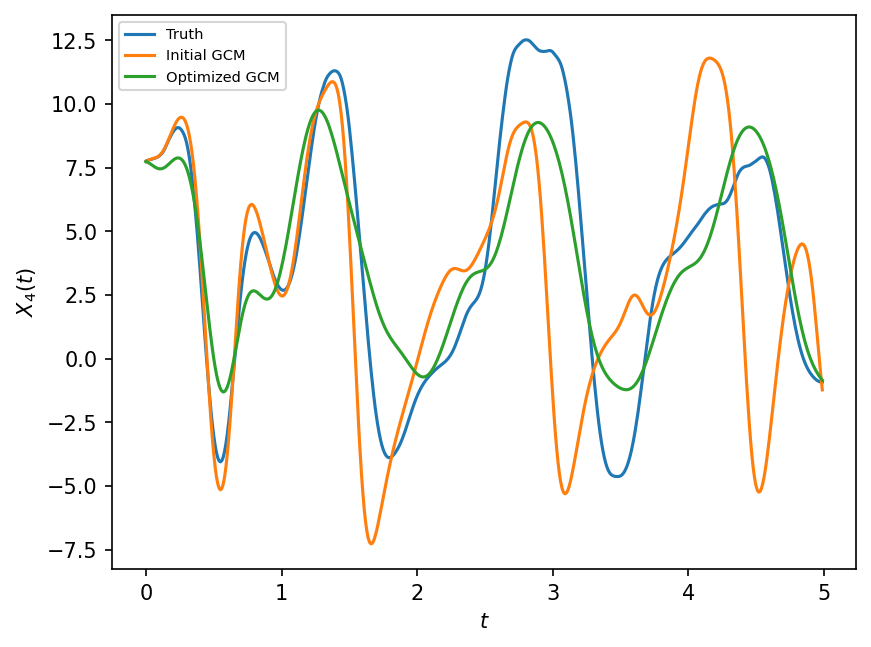

In [82]:
plt.figure(dpi=150)
plt.plot(t[:500], X_true[:500, 4], label="Truth")
plt.plot(t[:500], X_prior[:500, 4], label="Initial GCM")
plt.plot(t[:500], X_optimized[:500, 4], label="Optimized GCM")
plt.xlabel("$t$")
plt.ylabel("$X_4(t)$")
plt.legend(fontsize=7);